In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import r2_score
import seaborn as sns
import os


os.getcwd()

'c:\\Users\\alexa\\OneDrive\\Documents\\UNIVERSITE\\Master2_MIA\\supervisé\\compétition\\code'

In [148]:
data = pd.read_parquet('.\\data\\train.parquet',engine='pyarrow')
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon
0,1,2024-01-15 20:37:28,2024-01-15 20:56:43,1.0,3.30,1.0,N,1,19.1,3.5,0.5,4.80,0.0,1.0,2.5,0.0,40.734576,-74.002875,40.768615,-73.965635
1,2,2024-01-25 19:41:24,2024-01-25 19:44:42,1.0,0.72,1.0,N,1,5.8,2.5,0.5,2.46,0.0,1.0,2.5,0.0,40.768615,-73.965635,40.780436,-73.957012
2,2,2024-01-25 15:48:48,2024-01-25 16:24:23,2.0,7.45,1.0,N,1,38.7,0.0,0.5,3.00,0.0,1.0,2.5,0.0,40.717773,-74.007880,40.780436,-73.957012
3,2,2024-01-27 00:47:26,2024-01-27 00:55:55,1.0,1.53,1.0,N,1,10.0,1.0,0.5,2.25,0.0,1.0,2.5,0.0,40.720889,-73.996919,40.747746,-73.978492
4,2,2024-01-28 13:14:26,2024-01-28 13:22:34,1.0,1.53,1.0,N,1,10.0,0.0,0.5,3.50,0.0,1.0,2.5,0.0,40.768615,-73.965635,40.747746,-73.978492


In [149]:
print(data.describe())

            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  100000.000000                      100000                      100000   
mean        1.759540  2024-01-17 01:37:59.341700  2024-01-17 01:53:39.024740   
min         1.000000         2023-12-31 23:56:46         2024-01-01 00:03:50   
25%         2.000000         2024-01-09 15:34:38  2024-01-09 15:50:20.750000   
50%         2.000000  2024-01-17 11:32:54.500000         2024-01-17 11:51:50   
75%         2.000000         2024-01-24 18:09:36  2024-01-24 18:28:48.500000   
max         2.000000         2024-01-31 23:59:07         2024-02-01 10:57:24   
std         0.427365                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   payment_type  \
count    100000.000000  100000.000000  100000.000000  100000.000000   
mean          1.335090       3.213008       1.998210       1.186610   
min           0.000000       0.010000       1.000000       1.00000

In [150]:
data.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
congestion_surcharge            float64
Airport_fee                     float64
PU_location_lat                 float64
PU_location_lon                 float64
DO_location_lat                 float64
DO_location_lon                 float64
dtype: object

In [151]:
# Définir Y comme la colonne tip_amount
Y = data['tip_amount']

# Définir X comme le DataFrame sans la colonne tip_amount
X = data.drop(columns=['tip_amount'])

# Travail sur les variables Qualitatives

Quand on plot les variables on constate que certines devrait être des classes et non des variable quantitatives

In [152]:

# Liste des colonnes à transformer
colonnes_a_Quali = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type','improvement_surcharge','Airport_fee']
X['RatecodeID'] = X['RatecodeID'].replace(99., 6.)


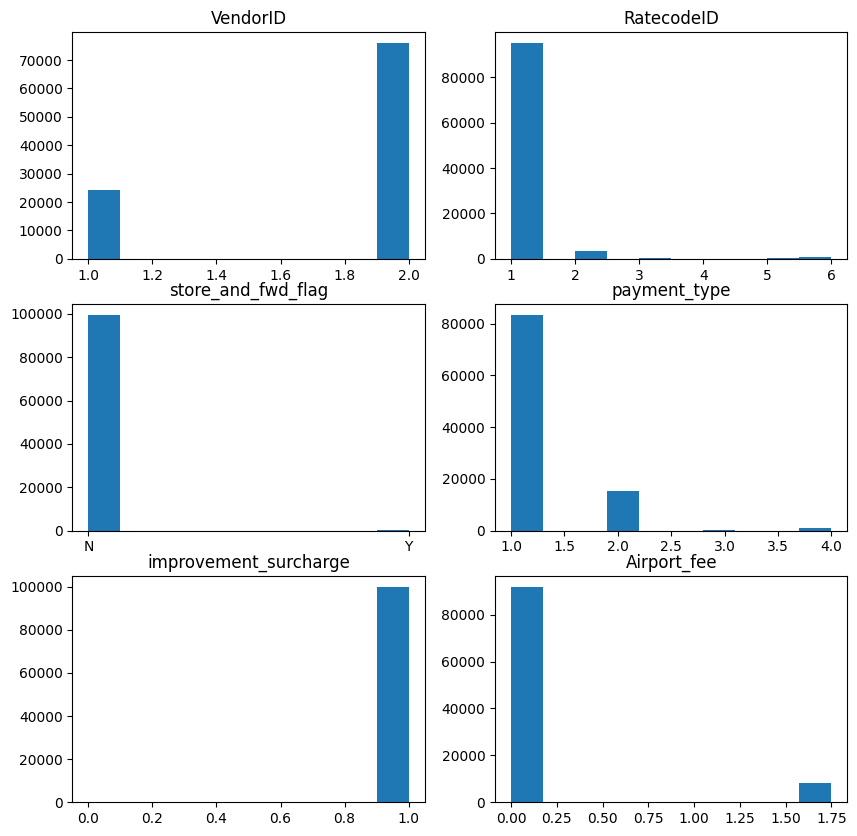

In [153]:
plt.figure(figsize=(10, 10))
# Convertir les colonnes de int à string
for i, colonne in enumerate(colonnes_a_Quali):
        X[colonne] = X[colonne].astype('category')

        plt.subplot(3, 2, i + 1)  # Créer une sous-figure pour chaque variable
        plt.hist(x=X[colonne])  # Scatter plot
        plt.title(colonne)

plt.show()



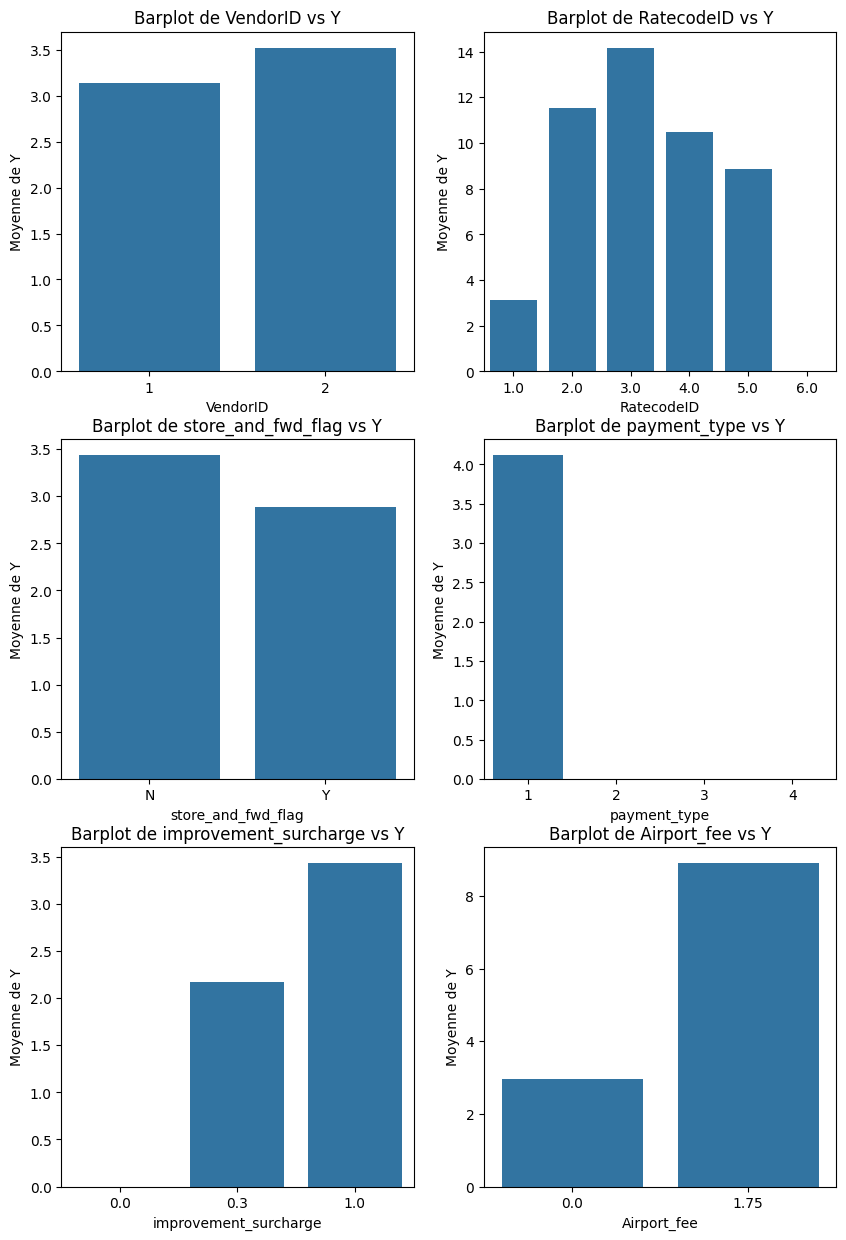

In [154]:
plt.figure(figsize=(10, 15))  # Définir la taille du graphique
# Boucle pour créer un barplot pour chaque variable
for i, var in enumerate(colonnes_a_Quali) : 
    plt.subplot(3, 2, i + 1)
    sns.barplot(x=var, y=Y, data=X, estimator='mean', errorbar=None)  # Barplot avec la moyenne de Y
    plt.title(f'Barplot de {var} vs Y')
    plt.xlabel(var)
    plt.ylabel('Moyenne de Y')

plt.show()

In [155]:
X.dtypes


VendorID                       category
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                     category
store_and_fwd_flag             category
payment_type                   category
fare_amount                     float64
extra                           float64
mta_tax                         float64
tolls_amount                    float64
improvement_surcharge          category
congestion_surcharge            float64
Airport_fee                    category
PU_location_lat                 float64
PU_location_lon                 float64
DO_location_lat                 float64
DO_location_lon                 float64
dtype: object

# Travail sur les variables Quantitatives

In [156]:

X['durée'] = X['tpep_dropoff_datetime'] - X['tpep_pickup_datetime']
X['durée']= X['durée'].dt.total_seconds() /3600

print(X['durée'].describe())



count    100000.000000
mean          0.261023
std           0.598690
min           0.000000
25%           0.119722
50%           0.192222
75%           0.308889
max          23.990278
Name: durée, dtype: float64


In [157]:
X_filtre = X[X['durée']==0]
X_filtre


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon,durée
75212,1,2024-01-20 16:00:43,2024-01-20 16:00:43,2.0,1.8,1.0,N,2,15.6,2.5,0.5,0.0,1.0,2.5,0.0,40.748427,-73.999918,40.753309,-74.004016,0.0


In [158]:
index_a_supprimer =X[X['durée']==0].index
X= X.drop(index_a_supprimer)
Y= Y.drop(index_a_supprimer)
index_a_supprimer

Index([75212], dtype='int64')

In [159]:
X['durée'].describe()

count    99999.000000
mean         0.261026
std          0.598692
min          0.000833
25%          0.119722
50%          0.192222
75%          0.308889
max         23.990278
Name: durée, dtype: float64

On trouve une ligne qui à une durée nulle on décide de l'enlever pour pouvoir faire une colonne vitesse sans avoir des valeur infinie

In [160]:
X['vitesse'] = np.log(X['trip_distance']/(X['durée']/60))
X['vitesse'].describe()


count    99999.000000
mean         6.395337
std          0.516514
min          0.120808
25%          6.088480
50%          6.358913
75%          6.661901
max         12.566160
Name: vitesse, dtype: float64

In [161]:
X

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon,durée,vitesse
0,1,2024-01-15 20:37:28,2024-01-15 20:56:43,1.0,3.30,1.0,N,1,19.1,3.5,...,0.0,1.0,2.5,0.0,40.734576,-74.002875,40.768615,-73.965635,0.320833,6.425101
1,2,2024-01-25 19:41:24,2024-01-25 19:44:42,1.0,0.72,1.0,N,1,5.8,2.5,...,0.0,1.0,2.5,0.0,40.768615,-73.965635,40.780436,-73.957012,0.055000,6.666263
2,2,2024-01-25 15:48:48,2024-01-25 16:24:23,2.0,7.45,1.0,N,1,38.7,0.0,...,0.0,1.0,2.5,0.0,40.717773,-74.007880,40.780436,-73.957012,0.593056,6.625026
3,2,2024-01-27 00:47:26,2024-01-27 00:55:55,1.0,1.53,1.0,N,1,10.0,1.0,...,0.0,1.0,2.5,0.0,40.720889,-73.996919,40.747746,-73.978492,0.141389,6.475853
4,2,2024-01-28 13:14:26,2024-01-28 13:22:34,1.0,1.53,1.0,N,1,10.0,0.0,...,0.0,1.0,2.5,0.0,40.768615,-73.965635,40.747746,-73.978492,0.135556,6.517986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2,2024-01-19 09:12:12,2024-01-19 09:38:07,1.0,4.38,1.0,N,1,26.1,0.0,...,0.0,1.0,2.5,0.0,40.768615,-73.965635,40.718938,-73.990896,0.431944,6.410852
99996,2,2024-01-25 00:07:40,2024-01-25 00:25:13,1.0,5.34,1.0,N,1,25.4,1.0,...,0.0,1.0,2.5,0.0,40.748497,-73.992438,40.706808,-74.007496,0.292500,6.998861
99997,1,2024-01-08 09:27:23,2024-01-08 10:01:52,1.0,10.10,6.0,N,1,35.5,0.0,...,0.0,1.0,0.0,0.0,40.857779,-73.885867,40.773633,-73.981532,0.574722,6.960748
99998,2,2024-01-06 18:42:49,2024-01-06 19:23:57,1.0,5.82,1.0,N,2,36.6,0.0,...,0.0,1.0,2.5,0.0,40.780436,-73.957012,40.777427,-73.905407,0.685556,6.233171


In [162]:
X_quanti = X.drop(columns=colonnes_a_Quali)


In [163]:

quant_cols = X_quanti.columns.tolist()
len(quant_cols)


15

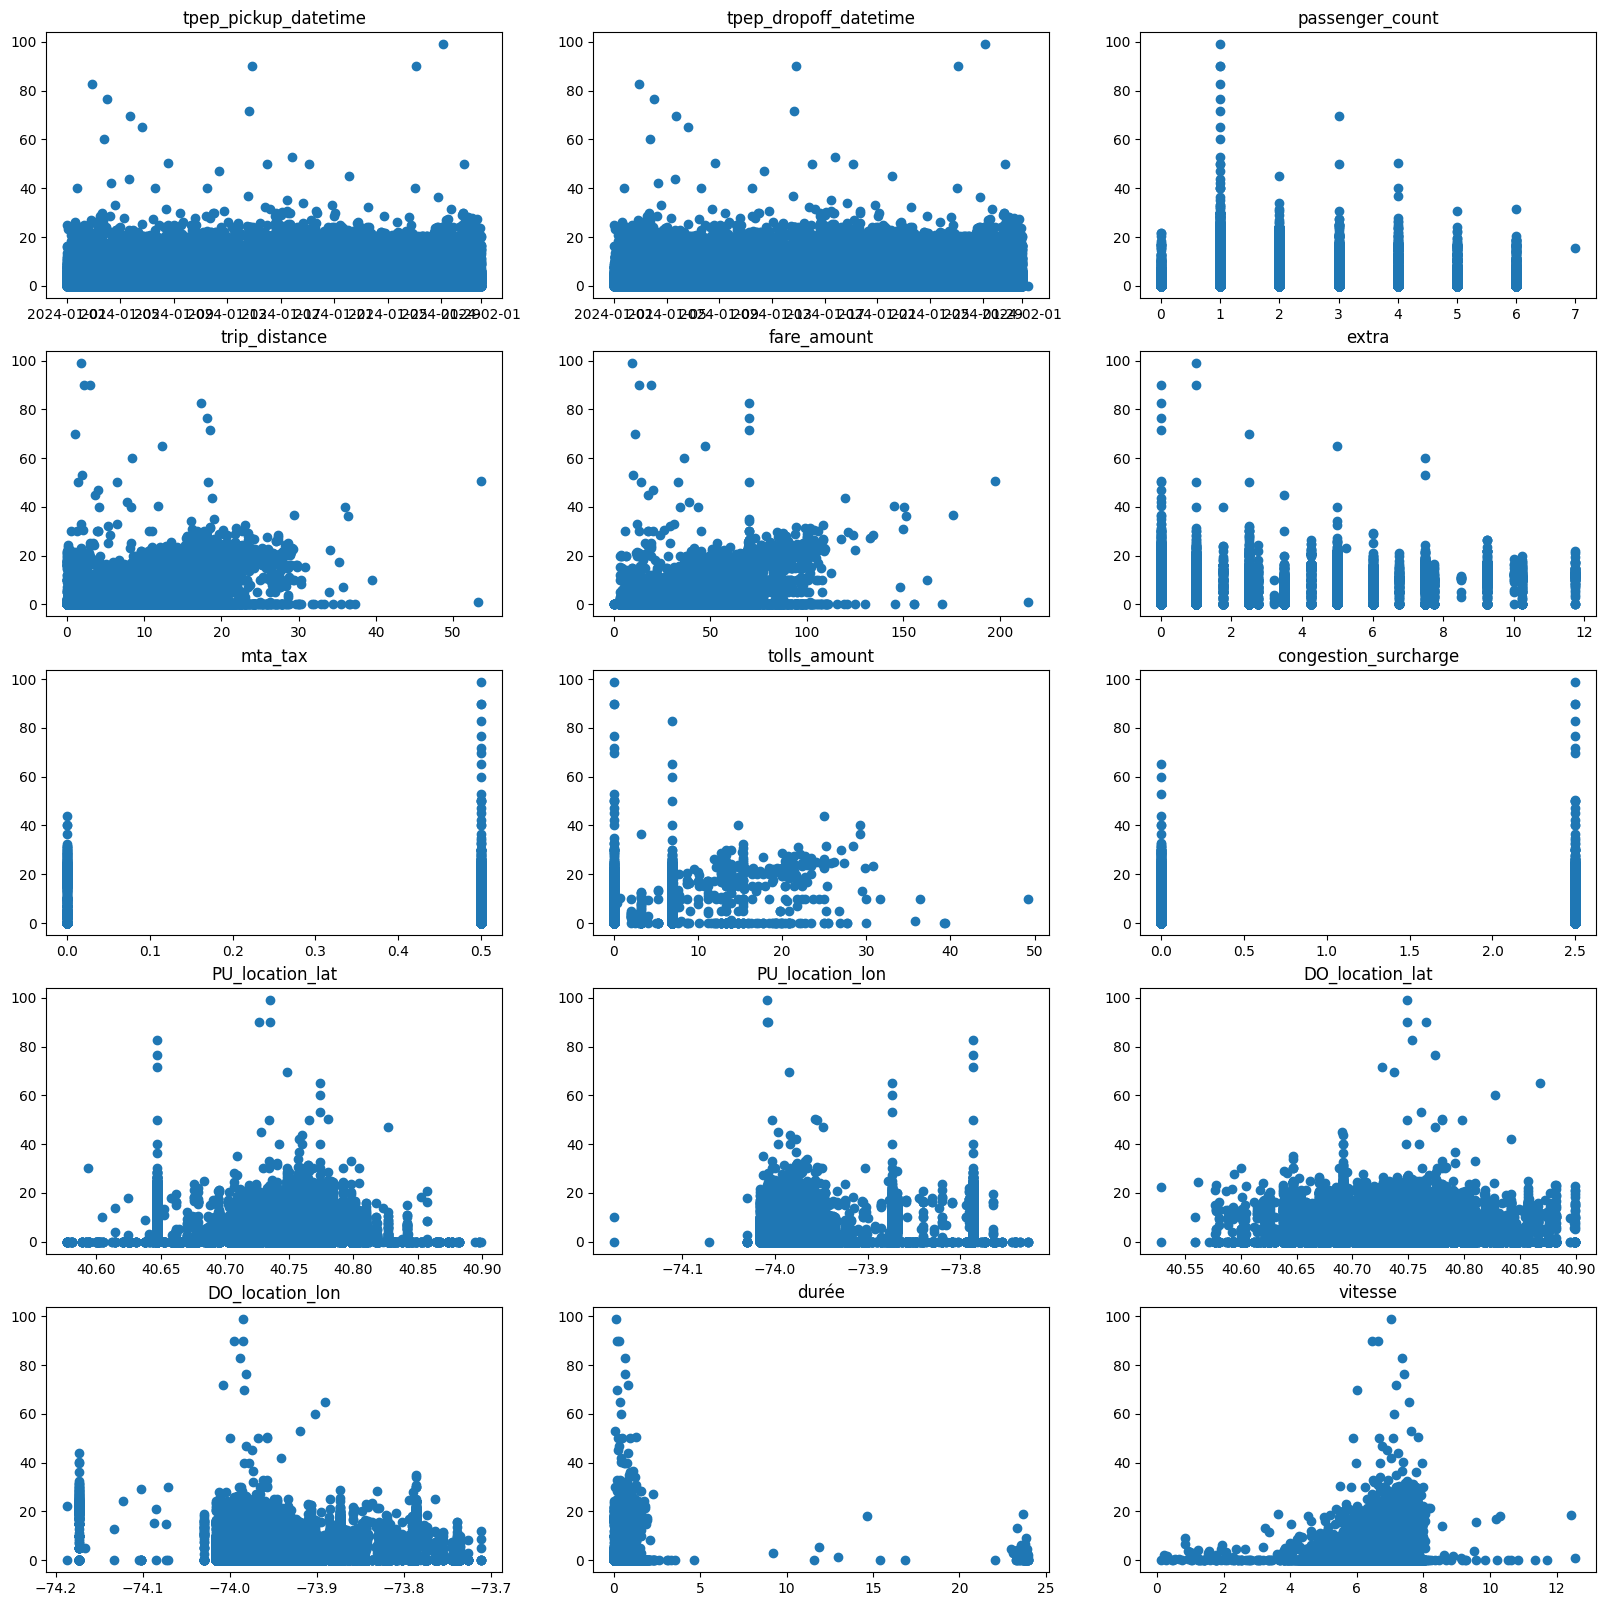

In [164]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(quant_cols):
    plt.subplot(5, 3, i + 1)  # Créer une sous-figure pour chaque variable
    plt.scatter(x=X_quanti[col],y= Y)  # Scatter plot
    plt.title(col)




plt.show()

In [165]:
X_pour_train = pd.get_dummies(X, columns= colonnes_a_Quali, drop_first=True)

In [166]:
X_pour_train= X_pour_train .drop(columns=['tpep_dropoff_datetime','tpep_pickup_datetime'])

In [167]:

X_train, X_test,y_train, y_test = train_test_split(X_pour_train, Y, test_size=0.33, random_state=123)
# Initialiser le modèle Random Forest pour la régression
rf = RandomForestRegressor(n_estimators= 1000, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 20, bootstrap= False, random_state=42)

# Ajuster le modèle sur les données d'entraînement
rf.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = rf.predict(X_test)

r2_score(y_test, y_pred)

0.7205557783291193

# Travail sur les variables géographiques

Clustering pour repéré des quartiers

In [355]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [367]:
X_geo = X[['PU_location_lat', 'PU_location_lon', 'DO_location_lat',
       'DO_location_lon']]
X_quanti_sansgeo = X_quanti.drop(columns=['PU_location_lat', 'PU_location_lon', 'DO_location_lat',
       'DO_location_lon','tpep_dropoff_datetime','tpep_pickup_datetime'])
X_quanti_sansgeo

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,congestion_surcharge,durée
0,1.0,3.30,19.1,3.5,0.5,0.0,2.5,19.250000
1,1.0,0.72,5.8,2.5,0.5,0.0,2.5,3.300000
2,2.0,7.45,38.7,0.0,0.5,0.0,2.5,35.583333
3,1.0,1.53,10.0,1.0,0.5,0.0,2.5,8.483333
4,1.0,1.53,10.0,0.0,0.5,0.0,2.5,8.133333
...,...,...,...,...,...,...,...,...
99995,1.0,4.38,26.1,0.0,0.5,0.0,2.5,25.916667
99996,1.0,5.34,25.4,1.0,0.5,0.0,2.5,17.550000
99997,1.0,10.10,35.5,0.0,0.5,0.0,0.0,34.483333
99998,1.0,5.82,36.6,0.0,0.5,0.0,2.5,41.133333


In [368]:
X_geo_scaled = StandardScaler().fit_transform(X_geo)
X_quanti_sansgeo_scaled =StandardScaler().fit_transform(X_quanti_sansgeo) 
X_geo_scaled

array([[-5.47802113e-01, -7.66965507e-01,  4.44338755e-01,
         1.73728574e-01],
       [ 5.11032501e-01, -1.35870759e-04,  8.23448131e-01,
         4.11306677e-01],
       [-1.07049084e+00, -8.70018141e-01,  8.23448131e-01,
         4.11306677e-01],
       ...,
       [ 3.28461255e+00,  1.64238367e+00,  6.05271517e-01,
        -2.64287728e-01],
       [ 8.78748125e-01,  1.77419650e-01,  7.26929416e-01,
         1.83313068e+00],
       [ 1.81707065e-01, -2.48536104e-01,  4.44338755e-01,
         1.73728574e-01]])

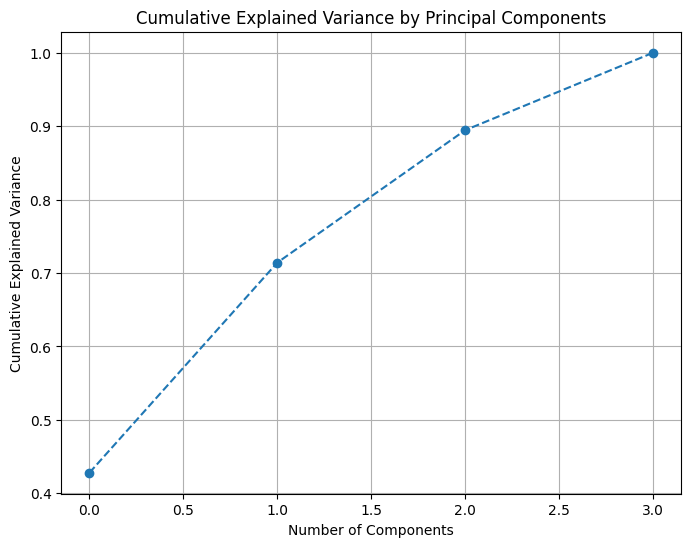

Composante 1: 0.43% de la variance expliquée
Composante 2: 0.29% de la variance expliquée
Composante 3: 0.18% de la variance expliquée
Composante 4: 0.11% de la variance expliquée


In [369]:
# Initialiser et ajuster l'ACP
pca = PCA()
pca.fit(X_geo_scaled)

# Obtenir les valeurs propres (variance expliquée par chaque composante)
explained_variance = pca.explained_variance_ratio_

# Tracer le diagramme des valeurs propres (scree plot)
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Afficher les variances expliquées par chaque composante (inertie)
for i, var in enumerate(explained_variance):
    print(f"Composante {i+1}: {var:.2f}% de la variance expliquée")

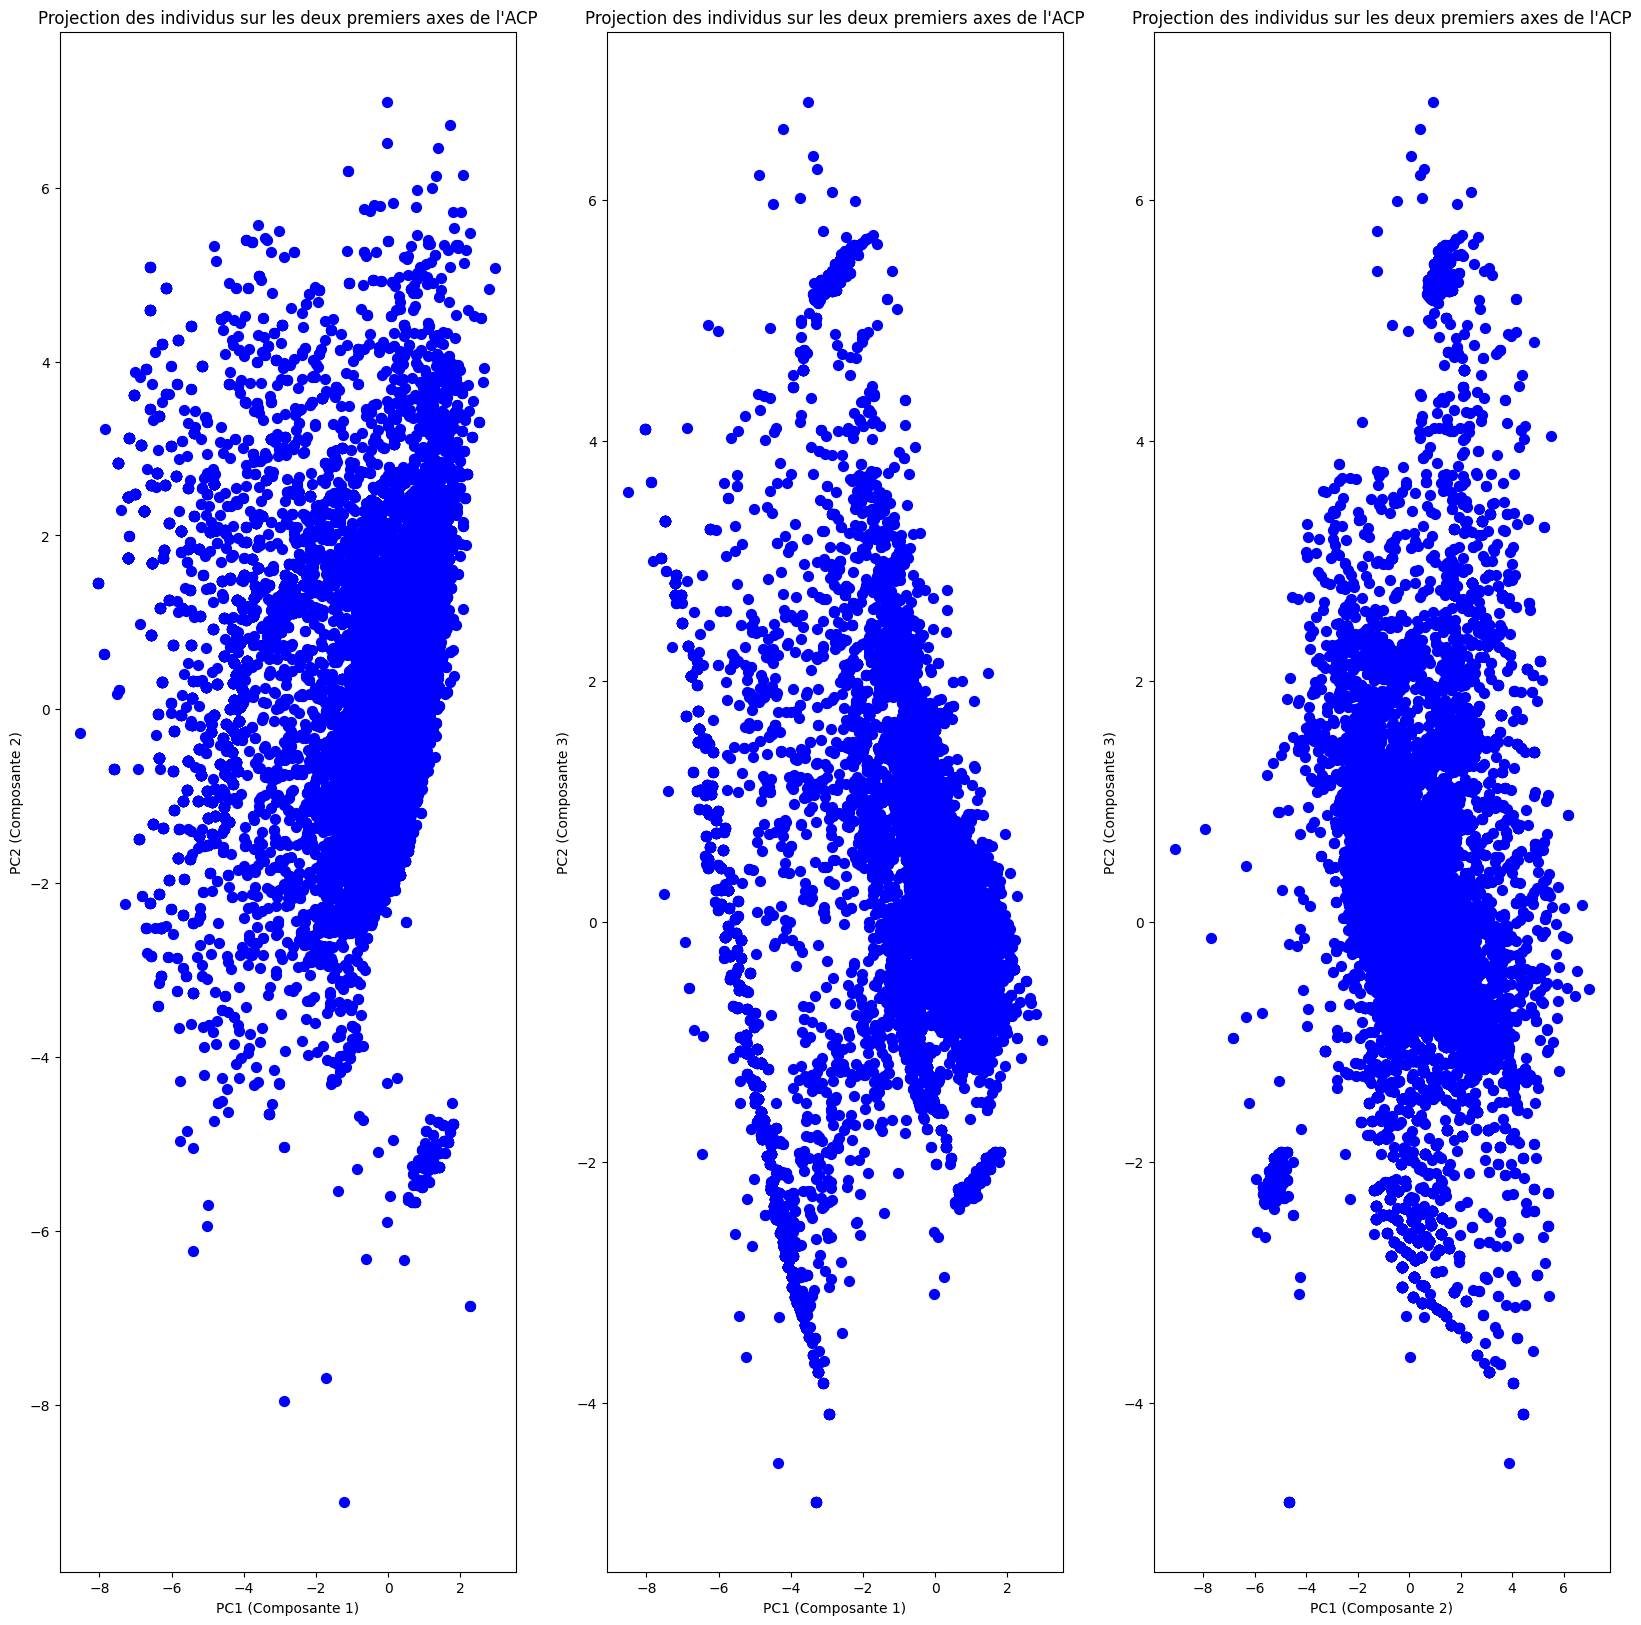

In [370]:
# Projeter les données sur les 3 premiers axes


X_projected = pca.transform(X_geo_scaled)

# Visualiser les individus sur un graphe 2D
plt.figure(figsize=(20, 20))
plt.subplot(1,3,1)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c='blue', s=50)
plt.xlabel('PC1 (Composante 1)')
plt.ylabel('PC2 (Composante 2)')
plt.title('Projection des individus sur les deux premiers axes de l\'ACP')

plt.subplot(1,3,2)
plt.scatter(X_projected[:, 0], X_projected[:, 2], c='blue', s=50)
plt.xlabel('PC1 (Composante 1)')
plt.ylabel('PC2 (Composante 3)')
plt.title('Projection des individus sur les deux premiers axes de l\'ACP')

plt.subplot(1,3,3)
plt.scatter(X_projected[:, 1], X_projected[:, 2], c='blue', s=50)
plt.xlabel('PC1 (Composante 2)')
plt.ylabel('PC2 (Composante 3)')
plt.title('Projection des individus sur les deux premiers axes de l\'ACP')

plt.show()

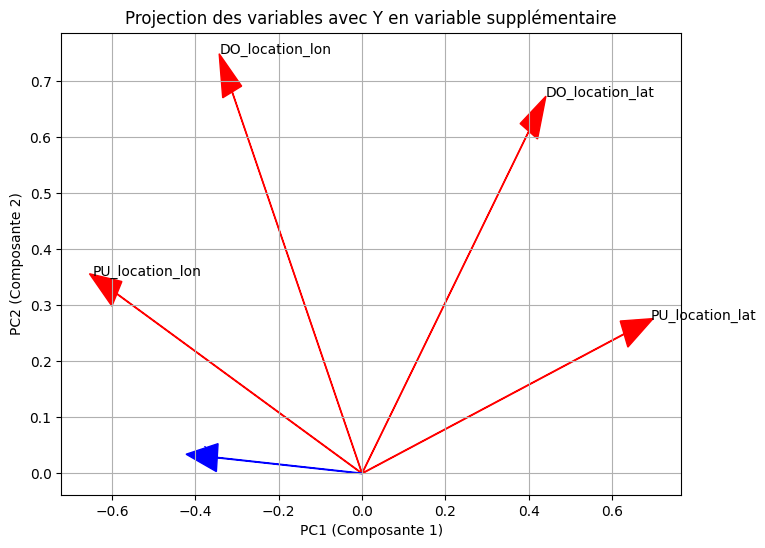

In [371]:
# Effectuer l'ACP
pca = PCA(n_components=3)  # Limité à 2 axes
X_projected = pca.fit_transform(X_geo_scaled)

# Projeter les données dans les 2 premiers axes
pcs = pca.components_[:2]  # Composantes principales pour les variables explicatives

# Plot des vecteurs des variables dans le biplot
plt.figure(figsize=(8, 6))

# Tracer les variables explicatives
for i, var in enumerate(X_geo.columns):  # Remplace X.columns par tes noms de colonnes
    plt.arrow(0, 0, pcs[0, i], pcs[1, i], color='r', head_width=0.05)
    plt.text(pcs[0, i] * 1.1, pcs[1, i] * 1.1, var, color='black')

# Ajouter Y comme variable supplémentaire
# Normaliser Y pour le projeter correctement (ou scaler pour correspondre)
Y_scaled = (Y - Y.mean()) / Y.std()  # Normalisation de Y si nécessaire

# Calculer la corrélation entre Y et les axes principaux
corr_Y_PC1 = np.corrcoef(X_projected[:, 0], Y_scaled)[0, 1]  # Corrélation avec PC1
corr_Y_PC2 = np.corrcoef(X_projected[:, 1], Y_scaled)[0, 1]  # Corrélation avec PC2

# Ajouter Y projeté sur le biplot
plt.arrow(0, 0, corr_Y_PC1, corr_Y_PC2, color='blue', head_width=0.05, label='Y')
plt.text(corr_Y_PC1 * 1.1, corr_Y_PC2 * 1.1, 'Y', color='blue')

# Configurer le graphe
plt.xlabel('PC1 (Composante 1)')
plt.ylabel('PC2 (Composante 2)')
plt.title('Projection des variables avec Y en variable supplémentaire')
plt.grid()

plt.show()

In [372]:
X_projected

array([[ 0.23064213,  0.00748918,  0.03270302],
       [ 0.52309097,  0.90945328, -0.08158819],
       [ 0.04020696,  0.23757065, -0.13850562],
       ...,
       [ 1.42439463,  1.53234745, -0.3294601 ],
       [ 0.16784822,  1.9663857 ,  0.89128737],
       [ 0.38439944,  0.35495124,  0.00795322]])

In [374]:
col_quanti_scaled = X_quanti_sansgeo.columns
print(col_quanti_scaled ) 

X_geo_scaled_train = X_quanti
for i,col in enumerate(col_quanti_scaled):
    X_geo_scaled_train[col] = X_quanti_sansgeo_scaled[:,i]

print(X_geo_scaled_train)

Index(['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tolls_amount', 'congestion_surcharge', 'durée'],
      dtype='object')
      tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0      2024-01-15 20:37:28   2024-01-15 20:56:43        -0.395274   
1      2024-01-25 19:41:24   2024-01-25 19:44:42        -0.395274   
2      2024-01-25 15:48:48   2024-01-25 16:24:23         0.784332   
3      2024-01-27 00:47:26   2024-01-27 00:55:55        -0.395274   
4      2024-01-28 13:14:26   2024-01-28 13:22:34        -0.395274   
...                    ...                   ...              ...   
99995  2024-01-19 09:12:12   2024-01-19 09:38:07        -0.395274   
99996  2024-01-25 00:07:40   2024-01-25 00:25:13        -0.395274   
99997  2024-01-08 09:27:23   2024-01-08 10:01:52        -0.395274   
99998  2024-01-06 18:42:49   2024-01-06 19:23:57        -0.395274   
99999  2024-01-25 22:43:34   2024-01-25 22:52:34        -0.395274   

       trip_di

In [375]:

# Remplacer les 4 colonnes originales dans les jeux de données d'entraînement et de test
X_geo_scaled_train['PC1'] = X_projected[:, 0]
X_geo_scaled_train['PC2'] = X_projected[:, 1]
X_geo_scaled_train['PC3'] = X_projected[:, 2]




In [376]:
X2= pd.concat([X_geo_scaled_train, X_quali], axis=1)



tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tolls_amount                    float64
congestion_surcharge            float64
PU_location_lat                 float64
PU_location_lon                 float64
DO_location_lat                 float64
DO_location_lon                 float64
durée                           float64
PC1                             float64
PC2                             float64
PC3                             float64
VendorID                       category
RatecodeID                     category
store_and_fwd_flag             category
payment_type                   category
improvement_surcharge          category
Airport_fee                    category
dtype: object


In [378]:
X2

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,congestion_surcharge,PU_location_lat,...,durée,PC1,PC2,PC3,VendorID,RatecodeID,store_and_fwd_flag,payment_type,improvement_surcharge,Airport_fee
0,2024-01-15 20:37:28,2024-01-15 20:56:43,-0.395274,0.020615,0.066651,1.097035,0.073478,-0.260261,0.265719,40.734576,...,0.099902,0.230642,0.007489,0.032703,1,1.0,N,1,1.0,0.0
1,2024-01-25 19:41:24,2024-01-25 19:44:42,-0.395274,-0.590773,-0.773009,0.537749,0.073478,-0.260261,0.265719,40.768615,...,-0.344125,0.523091,0.909453,-0.081588,2,1.0,N,1,1.0,0.0
2,2024-01-25 15:48:48,2024-01-25 16:24:23,0.784332,1.004049,1.304045,-0.860465,0.073478,-0.260261,0.265719,40.717773,...,0.554601,0.040207,0.237571,-0.138506,2,1.0,N,1,1.0,0.0
3,2024-01-27 00:47:26,2024-01-27 00:55:55,-0.395274,-0.398826,-0.507853,-0.301180,0.073478,-0.260261,0.265719,40.720889,...,-0.199828,-0.266980,-0.708586,0.030302,2,1.0,N,1,1.0,0.0
4,2024-01-28 13:14:26,2024-01-28 13:22:34,-0.395274,-0.398826,-0.507853,-0.860465,0.073478,-0.260261,0.265719,40.768615,...,-0.209571,0.287791,-0.133115,0.158765,2,1.0,N,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2024-01-19 09:12:12,2024-01-19 09:38:07,-0.395274,0.276545,0.508577,-0.860465,0.073478,-0.260261,0.265719,40.768615,...,0.285494,0.024389,-0.929535,0.483399,2,1.0,N,1,1.0,0.0
99996,2024-01-25 00:07:40,2024-01-25 00:25:13,-0.395274,0.504038,0.464385,-0.301180,0.073478,-0.260261,0.265719,40.748497,...,0.052577,-0.057571,-1.810581,0.491209,2,1.0,N,1,1.0,0.0
99997,2024-01-08 09:27:23,2024-01-08 10:01:52,-0.395274,1.632025,1.102021,-0.860465,0.073478,-0.260261,-3.763376,40.857779,...,0.523979,1.424395,1.532347,-0.329460,1,99.0,N,1,1.0,0.0
99998,2024-01-06 18:42:49,2024-01-06 19:23:57,-0.395274,0.617784,1.171467,-0.860465,0.073478,-0.260261,0.265719,40.780436,...,0.709106,0.167848,1.966386,0.891287,2,1.0,N,2,1.0,0.0


In [379]:
X2 = X2.drop(columns=['PU_location_lat', 'PU_location_lon', 'DO_location_lat',
       'DO_location_lon','tpep_dropoff_datetime','tpep_pickup_datetime'])

In [380]:
X2.dtypes

passenger_count           float64
trip_distance             float64
fare_amount               float64
extra                     float64
mta_tax                   float64
tolls_amount              float64
congestion_surcharge      float64
PU_location_lat           float64
PU_location_lon           float64
DO_location_lat           float64
DO_location_lon           float64
durée                     float64
PC1                       float64
PC2                       float64
PC3                       float64
VendorID                 category
RatecodeID               category
store_and_fwd_flag       category
payment_type             category
improvement_surcharge    category
Airport_fee              category
dtype: object

In [382]:
X2 = pd.get_dummies(X2, columns=colonnes_a_convertir, drop_first=True)
X_train, X_test,y_train, y_test = train_test_split(X2, Y, test_size=0.33, random_state=123)

# Initialiser le modèle Random Forest pour la régression
rf = RandomForestRegressor(n_estimators= 1000, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 20, bootstrap= False, random_state=42)

# Ajuster le modèle sur les données d'entraînement
rf.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = rf.predict(X_test)

r2_score(y_test, y_pred)

0.7079004503986557

Faire du clustering pour repérer des quartiers

In [216]:
from sklearn.cluster import KMeans

In [393]:
# Initialiser KMeans avec un nombre de clusters depart (à ajuster selon tes besoins)
kmeans_depart = KMeans(n_clusters=5, random_state=42)
X_cluster = X

# Appliquer KMeans sur les trois premières composantes principales
X_cluster ['cluster_depart'] = kmeans_depart.fit_predict(X_cluster[['PU_location_lat', 'PU_location_lon']])
X_cluster ['cluster_depart'] = X_cluster ['cluster_depart'].astype('category')



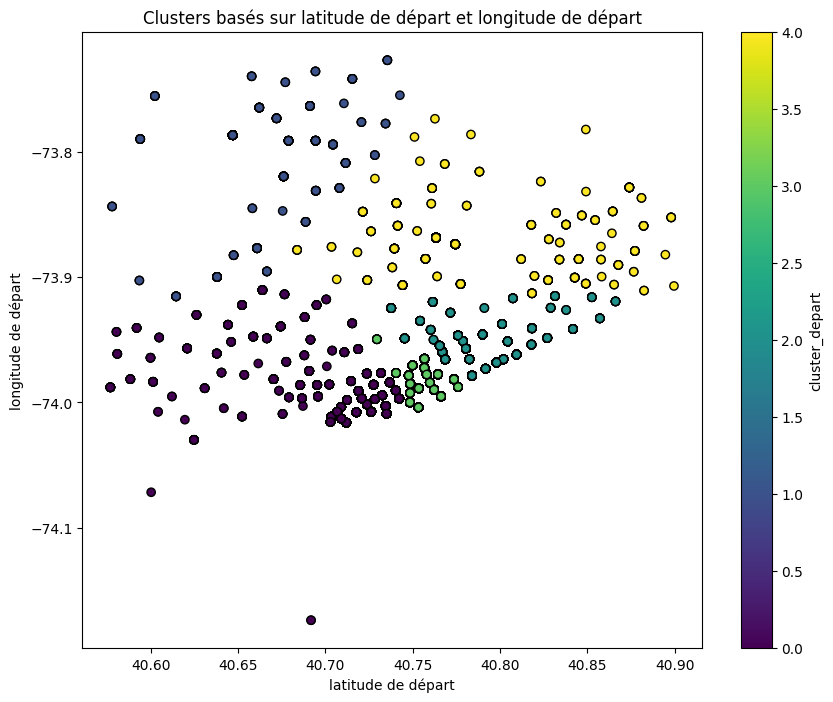

In [394]:
# Visualisation des clusters sur PC1 et PC2
plt.figure(figsize=(10, 8))
plt.scatter(X_cluster['PU_location_lat'], X_cluster['PU_location_lon'], c=X_cluster ['cluster_depart'], cmap='viridis', marker='o', edgecolor='k')
plt.title('Clusters basés sur latitude de départ et longitude de départ')
plt.xlabel('latitude de départ')
plt.ylabel('longitude de départ')
plt.colorbar(label='cluster_depart')
plt.show()



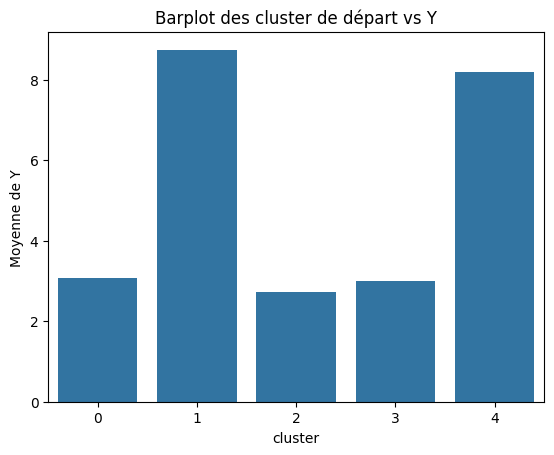

In [395]:
sns.barplot(x= X_cluster['cluster_depart'], y= Y, data=data, estimator='mean', errorbar=None)  # Barplot avec la moyenne de Y
plt.title(f'Barplot des cluster de départ vs Y')
plt.xlabel('cluster')
plt.ylabel('Moyenne de Y')
plt.show()


In [289]:
X_cluster = X_cluster .drop(columns=['tpep_dropoff_datetime','tpep_pickup_datetime'])

In [301]:
var_qual_cluster = colonnes_a_convertir

In [302]:

var_qual_cluster.append('cluster_depart')

In [296]:
X_cluster = pd.get_dummies(X_cluster, columns= var_qual_cluster, drop_first=True)

In [143]:

X_train, X_test,y_train, y_test = train_test_split(X_cluster, Y, test_size=0.33, random_state=123)


In [298]:

# Initialiser le modèle Random Forest pour la régression
rf = RandomForestRegressor(n_estimators= 1000, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 20, bootstrap= False, random_state=42)

# Ajuster le modèle sur les données d'entraînement
rf.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = rf.predict(X_test)

r2_score(y_test, y_pred)

0.7108211909064835

Faire la regression linéaire avec du onehot encoding sur variables quali

Ajouter une variables jour de la semaine et heure de la journée 

Pour l'instant on détermine des moments de la journée, on pourrait aussi juste prendre les heures

In [471]:
# Fonction pour déterminer si c'est un week-end ou un jour de semaine
def determine_weekend_weekday(date):
    return 'weekend' if date.weekday() >= 5 else 'semaine'  # 5 et 6 sont samedi et dimanche

# Fonction pour déterminer l'heure de la journée
def determine_time_of_day(date):
    hour = date.hour
    if 5 <= hour < 12:
        return 'matin'  # 5h à 11h59
    elif 12 <= hour < 18:
        return 'après-midi'  # 12h à 17h59
    elif 18 <= hour < 22:
        return 'soirée'  # 18h à 21h59
    else:
        return 'nuit'  # 22h à 4h59
# Appliquer les fonction pour créer les nouvelle colonne 'Jour' et 'moment de la journée'

X['Jour'] = X['tpep_pickup_datetime'].apply(determine_weekend_weekday).astype('category')
X['moment de la journée'] = X['tpep_pickup_datetime'].apply(determine_time_of_day).astype('category')
X.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tolls_amount',
       'improvement_surcharge', 'congestion_surcharge', 'Airport_fee',
       'PU_location_lat', 'PU_location_lon', 'DO_location_lat',
       'DO_location_lon', 'durée', 'vitesse', 'Jour', 'moment de la journée'],
      dtype='object')

In [396]:
'''
# Initialiser KMeans avec un nombre de clusters depart (à ajuster selon tes besoins)
kmeans_depart = KMeans(n_clusters=5, random_state=42)
X_cluster = X

# Appliquer KMeans sur les trois premières composantes principales
X_cluster ['cluster_depart'] = kmeans_depart.fit_predict(X_cluster[['PU_location_lat', 'PU_location_lon']])
X_cluster ['cluster_depart'] = X_cluster ['cluster_depart'].astype('category')
'''

In [489]:
variables_categorielle.append('Jour')
variables_categorielle.append('moment de la journée')
#variables_categorielle.append('cluster_depart')

In [490]:
variables_categorielle

['VendorID',
 'RatecodeID',
 'store_and_fwd_flag',
 'payment_type',
 'improvement_surcharge',
 'Airport_fee',
 'Jour',
 'moment de la journée']

In [491]:
X_encoded.dtypes

VendorID                 category
passenger_count           float64
trip_distance             float64
RatecodeID               category
store_and_fwd_flag       category
payment_type             category
fare_amount               float64
extra                     float64
mta_tax                   float64
tolls_amount              float64
improvement_surcharge    category
congestion_surcharge      float64
Airport_fee              category
PU_location_lat           float64
PU_location_lon           float64
DO_location_lat           float64
DO_location_lon           float64
durée                     float64
vitesse                   float64
Jour                     category
moment de la journée     category
dtype: object

In [492]:


X_encoded = pd.get_dummies(X_encoded, columns=variables_categorielle, drop_first=True)



In [493]:
X_train, X_test,y_train, y_test = train_test_split(X_encoded, Y, test_size=0.33, random_state=123)

In [494]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
r2_score(y_test, y_pred)

ValueError: Input X contains infinity or a value too large for dtype('float64').

comme il y a beaucoup de classe je décide de me tourné vers la random forest

In [495]:
# Initialiser le modèle Random Forest pour la régression
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Ajuster le modèle sur les données d'entraînement
rf.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = rf.predict(X_test)

r2_score(y_test, y_pred)

ValueError: Input X contains infinity or a value too large for dtype('float32').

Recherche des meilleur parametre

In [420]:
from sklearn.model_selection import RandomizedSearchCV

In [421]:
'''
# Grille d'hyperparamètres à tester
param_distributions = {
    'n_estimators': [100, 200, 500],  # Nombre d'arbres
    'max_depth': [None, 10, 20, 30, 40],  # Profondeur maximale de chaque arbre
    'min_samples_split': [2, 5, 10],  # Minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [1, 2, 4],  # Minimum d'échantillons par feuille
    'max_features': ['auto', 'sqrt', 'log2'],  # Nombre de caractéristiques à considérer
    'bootstrap': [True, False]  # Si l'échantillonnage est fait avec ou sans remise
}
'''

In [422]:
'''
# Initialiser le modèle
rf = RandomForestRegressor(random_state=42)

# Initialiser la recherche aléatoire
random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_distributions, 
    n_iter=50,  # Nombre d'itérations (essais) aléatoires
    scoring='r2',  # Critère d'évaluation (ici, le R²)
    cv=5,  # Validation croisée à 5 plis
    verbose=2,  # Pour voir la progression
    n_jobs=-1,  # Utiliser tous les cœurs
    random_state=42
)
'''

In [423]:
'''
# Ajuster RandomizedSearchCV sur les données d'entraînement
random_search.fit(X_train, y_train)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres : ", random_search.best_params_)
'''

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\alexa\OneDrive\Documents\UNIVERSITE\Master2_MIA\supervisé\compétition\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
45 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\alexa\OneDrive\Documents\UNIVERSITE\Master2_MIA\supervisé\compétition\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\alexa\OneDrive\Documents\UNIVERSITE\Master2_MIA\supervisé\compétition\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\

Meilleurs hyperparamètres :  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


In [424]:
'''
# Utiliser le modèle optimisé pour faire des prédictions
y_pred_optimized = random_search.best_estimator_.predict(X_test)

r2_optimized = r2_score(y_test, y_pred_optimized)
print("R² optimisé : ", r2_optimized)
'''

R² optimisé :  0.709519981059334


In [433]:
X_encoded

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tolls_amount,congestion_surcharge,PU_location_lat,PU_location_lon,DO_location_lat,...,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_99.0,store_and_fwd_flag_Y,payment_type_2,payment_type_3,payment_type_4,improvement_surcharge_0.3,improvement_surcharge_1.0,Airport_fee_1.75
0,1.0,1.458615,19.1,3.5,0.5,0.0,2.5,40.734576,-74.002875,40.768615,...,False,False,False,False,False,False,False,False,True,False
1,1.0,0.542324,5.8,2.5,0.5,0.0,2.5,40.768615,-73.965635,40.780436,...,False,False,False,False,False,False,False,False,True,False
2,2.0,2.134166,38.7,0.0,0.5,0.0,2.5,40.717773,-74.007880,40.780436,...,False,False,False,False,False,False,False,False,True,False
3,1.0,0.928219,10.0,1.0,0.5,0.0,2.5,40.720889,-73.996919,40.747746,...,False,False,False,False,False,False,False,False,True,False
4,1.0,0.928219,10.0,0.0,0.5,0.0,2.5,40.768615,-73.965635,40.747746,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.0,1.682688,26.1,0.0,0.5,0.0,2.5,40.768615,-73.965635,40.718938,...,False,False,False,False,False,False,False,False,True,False
99996,1.0,1.846879,25.4,1.0,0.5,0.0,2.5,40.748497,-73.992438,40.706808,...,False,False,False,False,False,False,False,False,True,False
99997,1.0,2.406945,35.5,0.0,0.5,0.0,0.0,40.857779,-73.885867,40.773633,...,False,False,True,False,False,False,False,False,True,False
99998,1.0,1.919859,36.6,0.0,0.5,0.0,2.5,40.780436,-73.957012,40.777427,...,False,False,False,False,True,False,False,False,True,False


In [432]:
# Initialiser le modèle Random Forest pour la régression
rf = RandomForestRegressor(n_estimators= 1000, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 20, bootstrap= False, random_state=42)

# Ajuster le modèle sur les données d'entraînement
rf.fit(X_train, y_train)

# Prédire sur les données de test
y_pred = rf.predict(X_test)

r2_score(y_test, y_pred)

0.7144061622115564

Prédiction, soumission

In [599]:
data_test = pd.read_parquet('.\\data\\test.parquet',engine='pyarrow')
data_test

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee,PU_location_lat,PU_location_lon,DO_location_lat,DO_location_lon
row_ID,,,,,,,,,,,,,,,,,,,
0,2,2024-01-24 08:02:47,2024-01-24 08:04:45,1.0,0.36,1.0,N,1,4.4,0.0,0.5,0.0,1.0,2.5,0.0,40.740439,-73.976495,40.747746,-73.978492
1,2,2024-01-26 14:34:58,2024-01-26 14:42:51,1.0,1.78,1.0,N,1,10.7,0.0,0.5,0.0,1.0,2.5,0.0,40.791705,-73.973049,40.790011,-73.945750
2,2,2024-01-24 15:47:27,2024-01-24 15:51:48,2.0,0.43,1.0,N,2,5.8,0.0,0.5,0.0,1.0,0.0,0.0,40.791705,-73.973049,40.797962,-73.968168
3,2,2024-01-04 14:40:17,2024-01-04 14:44:21,1.0,0.61,1.0,N,1,5.8,0.0,0.5,0.0,1.0,2.5,0.0,40.783961,-73.978632,40.791705,-73.973049
4,2,2024-01-16 05:54:03,2024-01-16 05:55:59,1.0,0.71,1.0,N,2,5.1,1.0,0.5,0.0,1.0,2.5,0.0,40.748427,-73.999918,40.748427,-73.999918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627158,2,2024-01-09 14:22:25,2024-01-09 14:46:56,1.0,4.33,1.0,N,2,24.0,0.0,0.5,0.0,1.0,0.0,0.0,40.646985,-73.786530,40.704369,-73.793981
2627159,2,2024-01-02 19:23:16,2024-01-02 19:39:51,1.0,1.70,1.0,N,1,14.9,2.5,0.5,0.0,1.0,2.5,0.0,40.759818,-73.984197,40.748427,-73.999918
2627160,1,2024-01-28 12:29:13,2024-01-28 12:34:42,1.0,0.80,1.0,N,1,7.2,2.5,0.5,0.0,1.0,2.5,0.0,40.759818,-73.984197,40.773633,-73.981532


In [600]:
data_test['RatecodeID'] = data_test['RatecodeID'].replace(99., 6.)

In [601]:


print(data_test['payment_type'].unique())

[1 2 4 3]


In [602]:
colonnes_a_convertir = ['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type','improvement_surcharge','Airport_fee']

# Convertir les colonnes de int à string
for colonne in colonnes_a_convertir:
    if colonne == 'store_and_fwd_flag':
        data_test[colonne] = data_test[colonne].astype(str)
    else : 
        data_test[colonne] = data_test[colonne].astype('category')

In [603]:
data_test['durée'] = data_test['tpep_dropoff_datetime'] - data_test['tpep_pickup_datetime']
data_test['durée']= data_test['durée'].dt.total_seconds() / 60



In [604]:
data_test['Jour'] = data_test['tpep_dropoff_datetime'].apply(determine_weekend_weekday).astype('category')

In [605]:
#X_encoded = X.drop(columns=['tpep_dropoff_datetime','tpep_pickup_datetime'])
colonnes_a_convertir = colonnes_a_convertir.append('jour') 
data_test = pd.get_dummies(data_test, columns=colonnes_a_convertir, drop_first=True)

In [606]:
data_test = data_test.drop(columns=['tpep_dropoff_datetime','tpep_pickup_datetime'])

In [608]:
print(data_test.columns.size)
print(X_encoded.columns.size)

26
26


In [609]:
y_pred_test = rf.predict(data_test)

In [610]:
# Créer un DataFrame pour les prédictions
predictions_rf1 = pd.DataFrame({
    'row_ID': data_test.index,  # Index des données de test
    'tip_amount': y_pred_test    # Prédictions des pourboires
})

# Sauvegarder les prédictions au format parquet
predictions_rf1.to_parquet('.\\data\\predictions.parquet', engine='pyarrow', index=False)